In [1]:
import seibot.data
import seibot.isolation_system

config = "../config/example_config.ini"
data = seibot.data.Data(config)

In [2]:
f = data.f
relative_sensor = seibot.isolation_system.Sensor(f, data.relative_sensor_noise)
inertial_sensor = seibot.isolation_system.Sensor(f, data.inertial_sensor_noise)
seismometer = seibot.isolation_system.Sensor(f, data.seismometer_noise)
seismic_noise = data.seismic_noise
plant = seibot.isolation_system.Process(data.plant)
transmissivity = seibot.isolation_system.Process(data.transmissivity)
controller = seibot.isolation_system.Process(data.controller)

In [3]:
ham8 = seibot.isolation_system.IsolationSystem(
    relative_sensor=relative_sensor, inertial_sensor=inertial_sensor,
    seismometer=seismometer, plant=plant, transmissivity=transmissivity,
    controller=controller)

In [6]:
import seibot.filter

inv_filts = seibot.filter.InverseFilters()
gs13_inverse_filter = getattr(inv_filts, "gs13")
sts_inverse_filter = getattr(inv_filts, "sts")
print(gs13_inverse_filter)
print(sts_inverse_filter)


s^2 + 8.886 s + 39.48
---------------------
         s^3


1
-
s



In [9]:
sc_pool = seibot.filter.FilterPool("../config/sensor_correction_filters.ini", inverse_filter=sts_inverse_filter)
lp_pool = seibot.filter.FilterPool("../config/low_pass_filters.ini")
hp_pool = seibot.filter.FilterPool("../config/high_pass_filters.ini", inverse_filter=gs13_inverse_filter)

filter_configuration = seibot.filter.FilterConfigurations(sc_pool=sc_pool, lp_pool=lp_pool, hp_pool=hp_pool)
ham8.filter_configuration = filter_configuration(1, 2)

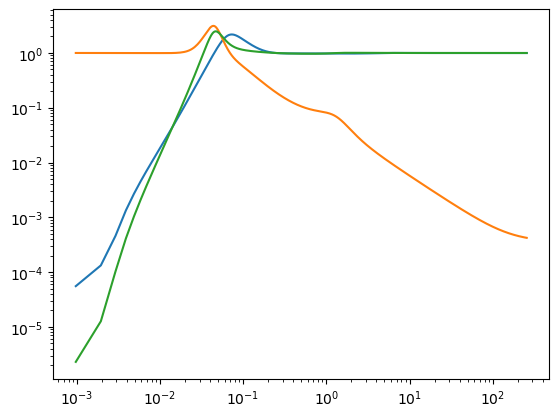

In [10]:
import matplotlib.pyplot as plt
import numpy as np

plt.loglog(f, abs(sc_pool[0](1j*2*np.pi*f)))
plt.loglog(f, abs(lp_pool[0](1j*2*np.pi*f)))
plt.loglog(f, abs(hp_pool[0](1j*2*np.pi*f)))

In [9]:
displacement = ham8.get_displacement(f, seismic_noise)

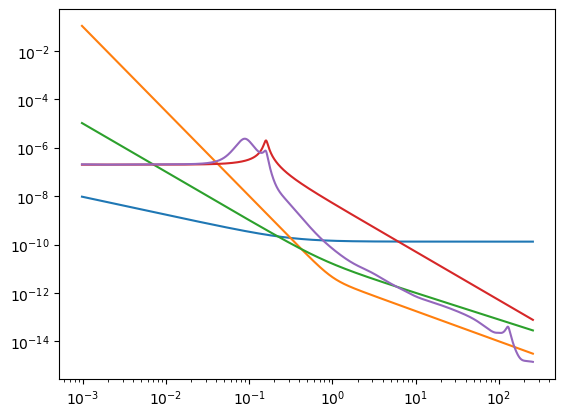

In [10]:
plt.loglog(f, relative_sensor.noise)
plt.loglog(f, inertial_sensor.noise)
plt.loglog(f, seismometer.noise)
plt.loglog(f, seismic_noise)
plt.loglog(f, displacement)
# plt.loglog(f, abs(plant(1j*2*np.pi*f)))
# plt.loglog(f, abs(transmissivity(1j*2*np.pi*f)))
# plt.loglog(f, abs(controller(1j*2*np.pi*f)))

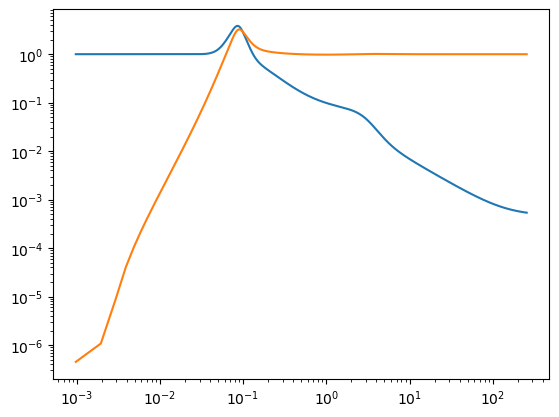

In [11]:
plt.loglog(f, abs(ham8.low_pass_filter(1j*2*np.pi*f)))
plt.loglog(f, abs(ham8.high_pass_filter(1j*2*np.pi*f)))